# [디스크 컨트롤러]

하드디스크는 한 번에 하나의 작업만 수행할 수 있습니다. 디스크 컨트롤러를 구현하는 방법은 여러 가지가 있습니다. 가장 일반적인 방법은 요청이 들어온 순서대로 처리하는 것입니다.

예를들어

- 0ms 시점에 3ms가 소요되는 A작업 요청
- 1ms 시점에 9ms가 소요되는 B작업 요청
- 2ms 시점에 6ms가 소요되는 C작업 요청


와 같은 요청이 들어왔습니다. 이를 그림으로 표현하면 아래와 같습니다.
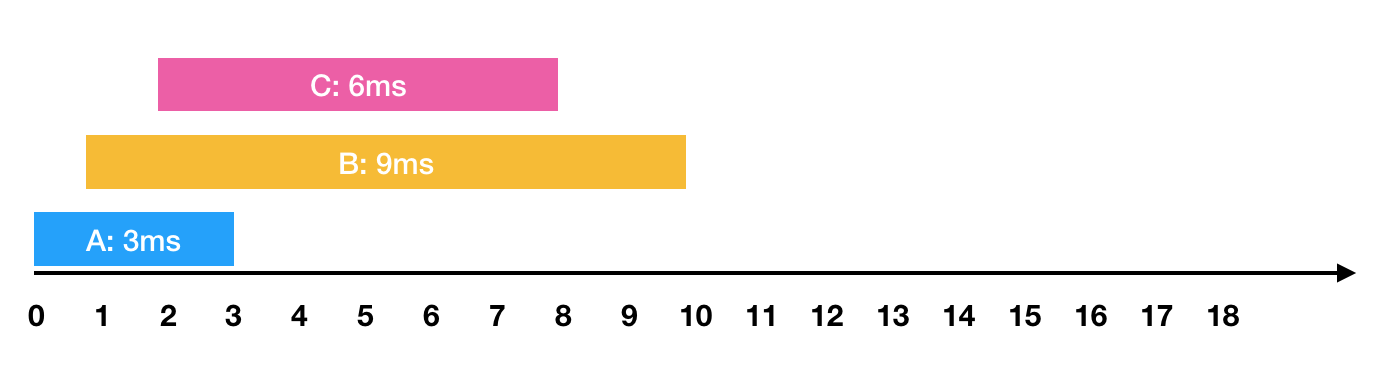

한 번에 하나의 요청만을 수행할 수 있기 때문에 각각의 작업을 요청받은 순서대로 처리하면 다음과 같이 처리 됩니다.
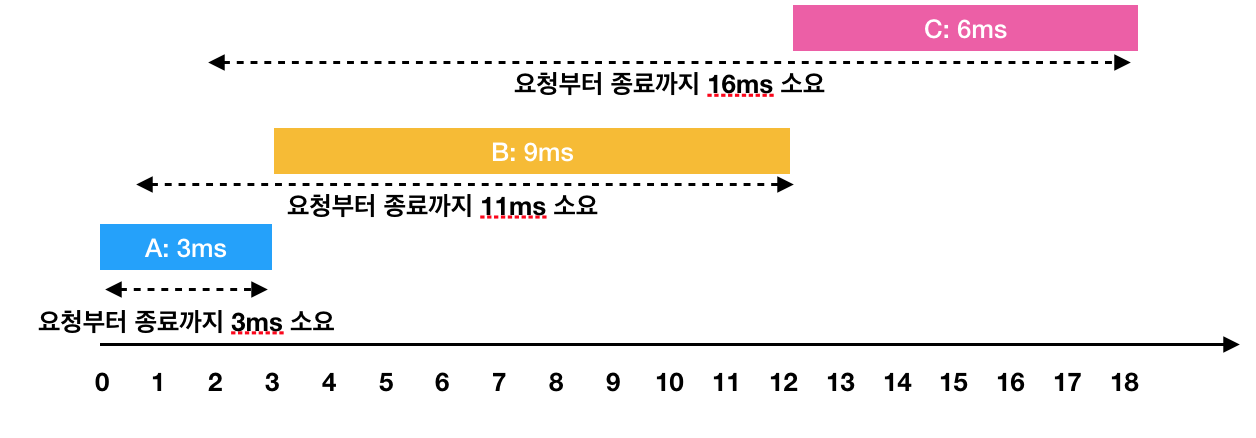

- A: 3ms 시점에 작업 완료 (요청에서 종료까지 : 3ms)
- B: 1ms부터 대기하다가, 3ms 시점에 작업을 시작해서 12ms 시점에 작업 완료(요청에서 종료까지 : 11ms)
- C: 2ms부터 대기하다가, 12ms 시점에 작업을 시작해서 18ms 시점에 작업 완료(요청에서 종료까지 : 16ms)


이 때 각 작업의 요청부터 종료까지 걸린 시간의 평균은 10ms(= (3 + 11 + 16) / 3)가 됩니다.

하지만 A → C → B 순서대로 처리하면
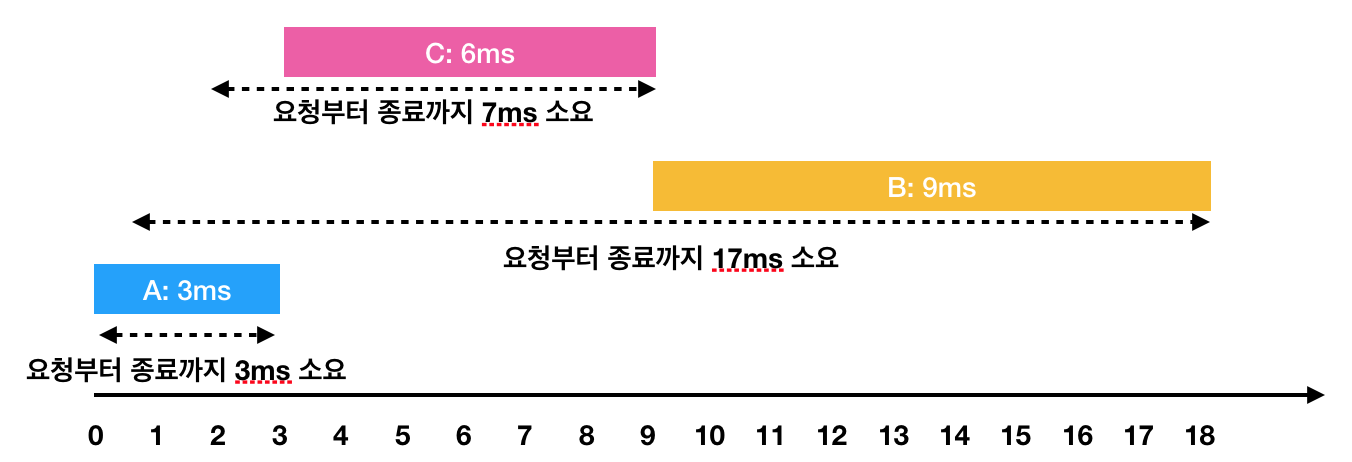

- A: 3ms 시점에 작업 완료(요청에서 종료까지 : 3ms)
- C: 2ms부터 대기하다가, 3ms 시점에 작업을 시작해서 9ms 시점에 작업 완료(요청에서 종료까지 : 7ms)
- B: 1ms부터 대기하다가, 9ms 시점에 작업을 시작해서 18ms 시점에 작업 완료(요청에서 종료까지 : 17ms)


이렇게 A → C → B의 순서로 처리하면 각 작업의 요청부터 종료까지 걸린 시간의 평균은 9ms(= (3 + 7 + 17) / 3)가 됩니다.



각 작업에 대해 [작업이 요청되는 시점, 작업의 소요시간]을 담은 2차원 배열 jobs가 매개변수로 주어질 때, 작업의 요청부터 종료까지 걸린 시간의 평균을 가장 줄이는 방법으로 처리하면 평균이 얼마가 되는지 return 하도록 solution 함수를 작성해주세요. (단, 소수점 이하의 수는 버립니다)

[제한 사항]
- jobs의 길이는 1 이상 500 이하입니다.
- jobs의 각 행은 하나의 작업에 대한 [작업이 요청되는 시점, 작업의 소요시간] 입니다.
- 각 작업에 대해 작업이 요청되는 시간은 0 이상 1,000 이하입니다.
- 각 작업에 대해 작업의 소요시간은 1 이상 1,000 이하입니다.
- 하드디스크가 작업을 수행하고 있지 않을 때에는 먼저 요청이 들어온 작업부터 처리합니다.

Solution 

In [67]:
import heapq

def solution(jobs):
    
    t_heap = [] 
    start, now, i, answer = -1, 0, 0, 0
    jobs.sort()
    
    while i < len(jobs):
        for j in jobs:
            if start < j[0] <= now:
                heapq.heappush(t_heap, (j[1], j[0])) 
            
        if len(t_heap) :          
            job = heapq.heappop(t_heap)
            start = now
            now += job[0]
            answer += now - job[1]
            i += 1
            
        else :
            now += 1

    return answer // len(jobs)


In [66]:
solution([[0, 3], [1, 9], [2, 6]])

9